# 🧠 Merkezi Eğilim Ölçüleri: Verinin Ortasını Bulmak

## Giriş: Veri Nerede Toplanıyor?

Diyelim ki bir ürün satıyorsun.  
Fiyatlar değişiyor, satış adetleri değişiyor.  
Ama senin ilk bakman gereken yer var:  
**Verinin ortası neresi?**


## 🔍 Merkezi Eğilim Nedir?

**Merkezi eğilim**, veri kümesindeki değerlerin **nereye yoğunlaştığını** gösteren istatistiksel ölçülerdir.

📌 3 temel merkezi eğilim ölçüsü vardır:
1. **Ortalama (Mean)**
2. **Medyan (Median)**
3. **Mod (Mode)**

Bazı özel durumlarda da kullanılır:
- **Ağırlıklı ortalama**
- **Geometrik ortalama**
- **Hareketli ortalama**
- **Kırpılmış ortalama**

## İstatistiksel Analizde Ortalamalar: Analitik vs. Analitik Olmayan

İstatistiksel analizde kullanılan ortalamalar, verilerin merkezi eğilimini özetlemek için kullanılan değerlerdir. Bu ortalamalar, verinin yapısına ve analiz amacına göre farklı şekillerde sınıflandırılabilir.

### Analitik Ortalamalar (Duyarlı Ortalamalar)

Bu tür ortalamalar, veri setindeki **tüm değerleri** matematiksel bir formül kullanarak hesaba katar. Uç değerler (aşırı büyük veya küçük değerler) bu ortalamaları önemli ölçüde etkileyebilir.

Başlıca analitik ortalamalar:

* **Aritmetik Ortalama:**
    $$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$
* **Tartılı Ortalama:**
    $$\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$
* **Geometrik Ortalama:**
    $$G = \left( \prod_{i=1}^{n} x_i \right)^{1/n}$$
* **Harmonik Ortalama:**
    $$H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$$
* **Kareli Ortalama (RMS):**
    $$RMS = \sqrt{\frac{\sum_{i=1}^{n} x_i^2}{n}}$$

### Analitik Olmayan Ortalamalar (Duyarsız Ortalamalar)

Bu tür ortalamalar, veri setindeki **tüm değerleri doğrudan hesaba katmazlar**. Daha ziyade, verinin sıralamasına veya en çok tekrar eden değerine odaklanırlar. Uç değerlerden daha az etkilenirler.

Başlıca analitik olmayan ortalamalar:

* **Medyan (Ortanca):** Sıralanmış bir veri setinin tam ortasındaki değerdir.
* **Mod (Tepe Değeri):** Bir veri setinde en çok tekrar eden değerdir.

### Özet Tablo

| Özellik                     | Analitik Ortalamalar (Duyarlı)             | Analitik Olmayan Ortalamalar (Duyarsız) |
| :--------------------------- | :------------------------------------------ | :-------------------------------------- |
| **Hesaplama** | Tüm değerler kullanılır                     | Sıralama veya en çok tekrar eden değer    |
| **Uç Değerlere Duyarlılık** | Yüksek                                      | Düşük                                   |
| **Veri Tipi** | Genellikle nicel (sayısal)                  | Nicel ve nitel (kategorik)             |
| **Başlıca Örnekler** | Aritmetik, tartılı, geometrik, harmonik, kareli | Medyan, Mod                             |
| **Kullanım Alanları** | Simetrik dağılımlar, tüm değerlerin etkisi önemli olduğunda | Çarpık dağılımlar, uç değerlerin etkisi azaltılmak istendiğinde, kategorik veriler |
​


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
veri_sayisi = 1000

# Yapay satış verisi oluşturma
fiyatlar = np.round(np.random.normal(loc=250, scale=50, size=veri_sayisi), 2)
satis_adetleri = np.random.poisson(lam=10, size=veri_sayisi)

# DataFrame'e çevirme
df = pd.DataFrame({
    "fiyat": fiyatlar,
    "satis_adedi": satis_adetleri
})

print("Sample veri seti - ilk 5 satır:")
print(df.head())

Sample veri seti - ilk 5 satır:
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9


## 📊 1. Ortalama (Mean)

### Tanım:
Tüm veri noktalarının toplamının, eleman sayısına bölümüdür.

📌 Özellikle normal dağılımlı verilerde güçlüdür.  
Ama aykırı değerlere karşı hassastır.

#### Python Kodu:

In [2]:
ortalama_fiyat = df['fiyat'].mean()
print(f"Ortalama Fiyat: {ortalama_fiyat:.2f} TL")

Ortalama Fiyat: 250.97 TL


## 📏 2. Medyan (Median)

### Tanım:
Veriyi küçükten büyüğe sıraladığımızda tam ortadaki değerdir.

📌 Aykırı değerlere dayanıklıdır.  
Özellikle çarpık verilerde tercih edilir.

#### Python Kodu:

In [3]:
medyan_fiyat = df['fiyat'].median()
print(f"Medyan Fiyat: {medyan_fiyat:.2f} TL")

Medyan Fiyat: 251.26 TL


## 🎯 3. Mod (Mode)

### Tanım:
En sık tekrar eden değerdir.

📌 Kategorik ya da kesikli verilerde kullanılır.  
Sürekli verilerde pek anlamlı olmayabilir.

#### Python Kodu:

In [4]:
mod_satis = df['satis_adedi'].mode()[0]
print(f"En Sık Görülen Satış Adedi (Mod): {mod_satis}")

En Sık Görülen Satış Adedi (Mod): 9


## 🚀 Özel Ortalamalar: Analitik Ortalamalar



### a) **Ağırlıklı Ortalama (Weighted Mean)**

> Örnek:  
Bir öğrencinin notları farklı ağırlıklara sahip olsun:

| Değer | Puan | Ağırlık |
|-------|------|----------|
| Ara Sınav | 80 | 0.2 |
| Proje | 90 | 0.3 |
| Final | 75 | 0.5 |

#### Python Kodu:

In [5]:
puanlar = np.array([80, 90, 75])
agirliklar = np.array([0.2, 0.3, 0.5])

agirlikli_ortalama = np.average(puanlar, weights=agirliklar)
print(f"Ağırlıklı Ortalama: {agirlikli_ortalama:.2f}")

Ağırlıklı Ortalama: 80.50


### b) **Geometrik Ortalama (Geometric Mean)**

> Büyüme oranlarını hesaplamak için idealdir.

#### Örnek:
Bir yatırımın yıllık getirileri:
- %20 → 1.20
- %30 → 1.30
- %10 → 1.10

#### Python Kodu:

In [6]:
getiriler = [1.2, 1.3, 1.1]

geometrik_ortalama = np.prod(getiriler) ** (1 / len(getiriler))
print(f"Geometrik Ortalama: %{(geometrik_ortalama - 1) * 100:.2f}")

Geometrik Ortalama: %19.72


### c) **Hareketli Ortalama (Moving Average)**

Zaman serisi verilerinde trendleri yakalamak için kullanılır.

#### Örnek:
Hisse senedi fiyatlarına göre hareketli ortalama alalım.

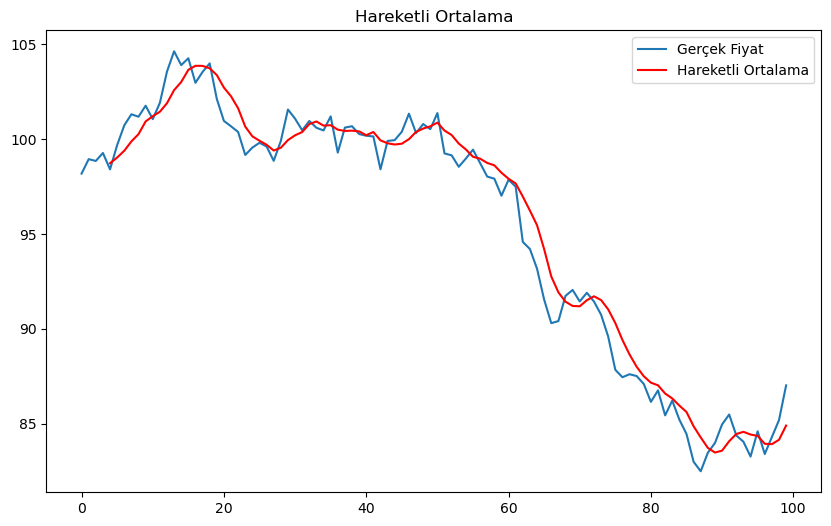

In [7]:
from statsmodels.tsa.stattools import adfuller

# Zaman serisi benzetimi
gunluk_fiyatlar = np.cumsum(np.random.randn(100)) + 100

# 5’lik pencere ile hareketli ortalama
hareketli_ortalama = pd.Series(gunluk_fiyatlar).rolling(window=5).mean()

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(gunluk_fiyatlar, label='Gerçek Fiyat')
plt.plot(hareketli_ortalama, label='Hareketli Ortalama', color='red')
plt.title("Hareketli Ortalama")
plt.legend()
plt.show()

### d) **Kırpılmış Ortalama (Trimmed Mean)**

Aykırı değerlerden etkilenmemek için uç değerler hariç ortalama alınır.

#### Örnek:
Satışlardaki aşırı yüksek/ucuz fiyatları dışarıda bırakarak ortalama alalım.

In [8]:
from scipy.stats import trim_mean

# En düşük ve en yüksek %5’i çıkar
kırpilmis_ortalama = trim_mean(df['fiyat'], proportiontocut=0.05)
print(f"%5 kırpılmış ortalama: {kırpilmis_ortalama:.2f} TL")

%5 kırpılmış ortalama: 250.59 TL


## 📈 Grafiklerle Merkeze Bakmak

### Histogram + Ortalama & Medyan Çizgileri

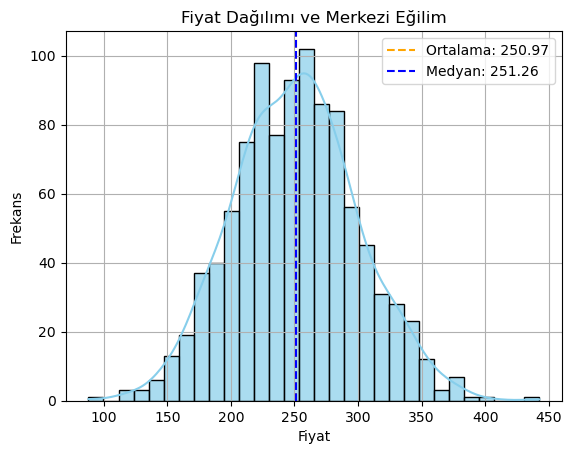

In [10]:
sns.histplot(df['fiyat'], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(ortalama_fiyat, color='orange', linestyle='--', label=f'Ortalama: {ortalama_fiyat:.2f}')
plt.axvline(medyan_fiyat, color='blue', linestyle='--', label=f'Medyan: {medyan_fiyat:.2f}')
plt.title('Fiyat Dağılımı ve Merkezi Eğilim')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.legend()
plt.grid(True)
plt.show()

## 🧩 Merkezi Eğilim Ölçüleri Ne Zaman Kullanılır?

| Ölçüm | Kullanım Alanı |
|--------|----------------|
| **Ortalama** | Normal dağılımda |
| **Medyan** | Sağa/sola çarpık veride |
| **Mod** | Kategorik veride |
| **Geometrik Ortalama** | Büyüme oranlarında |
| **Ağırlıklı Ortalama** | Her değerin farklı önemi varsa |
| **Hareketli Ortalama** | Trendleri izlemek için |
| **Kırpılmış Ortalama** | Aykırı değerler varsa |

📌 Her ölçek türü ve veri yapısı için uygun olanı seçmek önemlidir.

## 📌 Özet Tablo: Merkezi Eğilim Ölçüleri Karşılaştırması

| Ölçüm | Açıklama | Uygulanabilirlik |
|--------|----------|-------------------|
| **Ortalama** | Tüm verilerin ortası | Sayısal veri |
| **Medyan** | Ortadaki değer | Sayısal veri |
| **Mod** | En çok tekrar eden | Kategorik veya kesikli veri |
| **Ağırlıklı Ortalama** | Ağırlıklı katkılar | Sayısal veri, ağırlıklı veri |
| **Geometrik Ortalama** | Oranların ortalaması | Büyüme oranı, yatırım getirisi |
| **Hareketli Ortalama** | Trendleri görmek | Zaman serisi verileri |
| **Kırpılmış Ortalama** | Aykırıdan arındırılmış ortalama | Gürültülü veri |
